In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetworkGrid, set_seed

In [3]:
name = 'grid_06'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data/tracks_02'

In [4]:
tracks = Tracks()
tracks.load(load_path)

In [5]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [6]:
tracks.get_data().head()

,evol_stage,initial_feh,star_mass,luminosity,log_g,star_feh,log_frac_age,log_initial_mass,log_initial_MLT,log_initial_Yinit,...,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,1,-0.1,1.0,0.760630,4.560423,-0.100188,-2.394550,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.172096,0.009556,-0.153267,0.227380,-0.005188,0.002002,-0.011841
1,1,-0.1,1.0,0.749957,4.564024,-0.100198,-2.385753,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.163299,0.008922,-0.155067,0.230071,-0.005198,0.001994,-0.011848
2,1,-0.1,1.0,0.741406,4.566707,-0.100209,-2.375426,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.152973,0.008348,-0.156409,0.232081,-0.005209,0.001984,-0.011856
3,1,-0.1,1.0,0.735484,4.568303,-0.100221,-2.363350,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.140897,0.007876,-0.157207,0.233283,-0.005221,0.001973,-0.011865
4,1,-0.1,1.0,0.732361,4.568802,-0.100238,-2.349288,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.126835,0.007539,-0.157456,0.233670,-0.005238,0.001958,-0.011876


In [7]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm','log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'log_surface_he4_norm', 'log_surface_Z_norm']

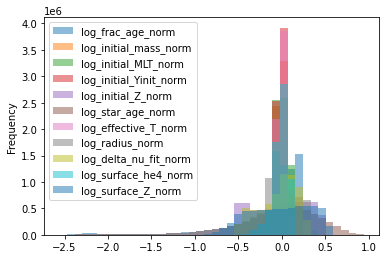

In [8]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [9]:
set_seed(101)

In [10]:
train = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
train.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
5323617,-0.413108,-0.066581,0.082728,0.000158,-0.098340,-0.120701,-0.005829,-0.186181,0.241946,0.035663,-0.064664
4920966,0.165619,0.083181,-0.000246,0.030121,0.471477,0.150685,-0.074867,0.292421,-0.399550,0.089082,0.526601
2948371,-0.273604,0.064698,-0.102909,-0.032027,0.011987,-0.388764,0.024218,0.018269,0.001753,-0.102742,-0.052748
229413,-0.588613,-0.046610,0.082728,0.030121,-0.110549,-0.448798,0.013448,-0.168372,0.224419,0.077867,-0.066061
1054345,-0.196777,-0.018276,-0.048551,0.030121,0.376348,0.090103,-0.034648,-0.105347,0.148099,0.052552,0.400300


In [11]:
print(f'Length of training data = {len(train)}')

Length of training data = 6454664


In [12]:
depth = [5, 6]
width = [128, 256]
activation = 'elu'
batch_size = int(0.001 * len(train))
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [13]:
grid = DenseNetworkGrid(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

grid.data

,depth,width,activation,batch_size,regularization_l2
name,,,,,
grid_06_0,5,128,elu,6454,0.0
grid_06_1,6,128,elu,6454,0.0
grid_06_2,5,256,elu,6454,0.0
grid_06_3,6,256,elu,6454,0.0


In [14]:
grid.make_networks()

In [15]:
grid.build_all(len(x_cols), len(y_cols))

In [16]:
grid.compile_all(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
grid.train_all(train, x_cols, y_cols, epochs=50, validation_split=0.2,
               callbacks=['checkpoint', 'tensorboard'], history_kw={'nth_row': 5})

Add a function which plots history for all networks.

Text(0, 0.5, 'loss (mae)')

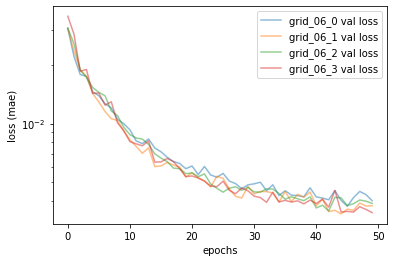

In [18]:
fig, ax = plt.subplots()
for network in grid.networks:
    network.history.plot(ax=ax, x='epochs', y=['val_loss'], logy=True, alpha=0.5,
                         label=[f'{network.name} val loss'])
ax.set_ylabel('loss (mae)')

In [19]:
val = train.tail(int(0.2*len(train)))
val.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
19625,-0.237984,-0.092910,-0.102909,0.000158,0.000049,0.206271,-0.044013,-0.166781,0.202753,0.008107,0.008811
4203944,0.085197,0.079547,-0.048551,0.058150,-0.320818,-0.385123,0.104631,0.132336,-0.192295,-0.072653,-0.429057
2543382,0.162476,-0.041757,-0.048551,0.000158,0.292482,0.565285,-0.070287,0.110050,-0.182016,0.025143,0.323336
59922,-0.259475,0.057078,-0.048551,-0.032027,0.304383,-0.204918,-0.004275,-0.035693,0.082048,-0.004672,0.332564
1303557,-0.321955,0.021033,-0.000246,-0.066789,0.121555,-0.146704,-0.004036,-0.089425,0.142982,-0.037119,0.151625


In [20]:
grid.evaluate_all(val.sample(n=1000))

,mae,mse
name,,
grid_06_0,0.004085,0.000050
grid_06_1,0.003835,0.000038
grid_06_2,0.004034,0.000047
grid_06_3,0.003528,0.000034


In [21]:
grid.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_06_0,5,128,elu,6454,0.0,grid_06_0_model.h5,grid_06_0_history.csv
grid_06_1,6,128,elu,6454,0.0,grid_06_1_model.h5,grid_06_1_history.csv
grid_06_2,5,256,elu,6454,0.0,grid_06_2_model.h5,grid_06_2_history.csv
grid_06_3,6,256,elu,6454,0.0,grid_06_3_model.h5,grid_06_3_history.csv


In [22]:
import seaborn as sns

In [23]:
len(val)

1290932

In [24]:
val = val.sample(n=10000)

In [25]:
df_dict = {}
for i, network in enumerate(grid.networks):
#     network = grid.networks[i]
    df_dict[network.name] = np.abs(network.predict(val) - val[y_cols].reset_index(drop=True))

In [26]:
df_err = pd.concat(df_dict).reset_index(level=0).rename(columns={'level_0': 'name'})
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_06_0,0.003564,0.000106,0.001935,0.004145,0.002557,0.003527
1,grid_06_0,0.005036,0.005523,0.008188,0.011318,0.002502,0.002003
2,grid_06_0,0.001186,0.000002,0.002582,0.002206,0.003693,0.004697
3,grid_06_0,0.004549,0.002521,0.002041,0.008383,0.004695,0.010397
4,grid_06_0,0.000468,0.002230,0.005998,0.009928,0.000944,0.000837


In [27]:
df_mae = pd.concat(df_dict).mean(axis=1).reset_index(level=0).rename(columns={'level_0': 'name', 0: 'mae'})
df_mae.head()

,name,mae
0,grid_06_0,0.002639
1,grid_06_0,0.005762
2,grid_06_0,0.002394
3,grid_06_0,0.005431
4,grid_06_0,0.003401


In [28]:
df_mae['log_mae'] = np.log10(df_mae['mae'])

In [29]:
order = df_mae.set_index('name').median(level=0).sort_values('log_mae', ascending=False).index

In [30]:
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_06_0,0.003564,0.000106,0.001935,0.004145,0.002557,0.003527
1,grid_06_0,0.005036,0.005523,0.008188,0.011318,0.002502,0.002003
2,grid_06_0,0.001186,0.000002,0.002582,0.002206,0.003693,0.004697
3,grid_06_0,0.004549,0.002521,0.002041,0.008383,0.004695,0.010397
4,grid_06_0,0.000468,0.002230,0.005998,0.009928,0.000944,0.000837


In [31]:
df_err_col = df_err.set_index('name').stack().reset_index().rename(columns={'level_1': 'output',
                                                                0: 'abs_err'})

df_err_col['log_abs_err'] = np.log10(df_err_col['abs_err'])

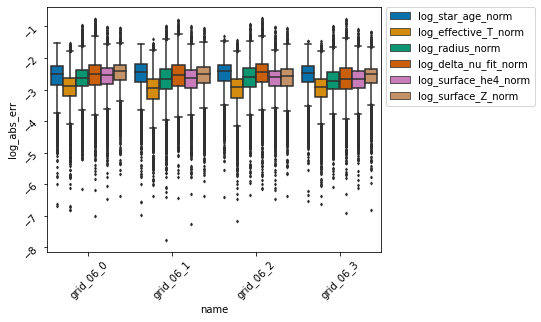

In [32]:
w = 1.5 * len(grid.data)
fig, ax = plt.subplots(figsize=(w, 4.5))
width = 0.15 * len(y_cols)
sns.boxplot(data=df_err_col, x='name', y='log_abs_err', hue='output',
            width=width, fliersize=2, color='C0', palette='colorblind',
            order=order, ax=ax, saturation=0.9)
# ax.set_yscale('log')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.legend(bbox_to_anchor=(1.0, 1.02))

In [33]:
scores = grid.score_all(val)

In [34]:
scores.xs('std', level=1)

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
grid_06_0,0.003546,0.002355,0.006073,0.009473,0.004930,0.004702
grid_06_1,0.003456,0.002324,0.005743,0.008966,0.004114,0.004081
grid_06_2,0.003732,0.002391,0.006244,0.009599,0.003938,0.004064
grid_06_3,0.003433,0.002037,0.005498,0.008560,0.003730,0.003506
